# Introdução

Uma parte fundamental da preparação de dados é a seleção de variáveis.

Feature selection  é o processo de selecionar o subconjunto de variáveis a serem usados para treinar um modelo de machine learning.

As variáveis utilizadas para treinar seus modelos de aprendizado de máquina têm uma grande influência no desempenho que você pode alcançar.

Assim, o presente projeto visa demonstrar a aplicação da seleção de variáveis para um cenários supervisionado de aprendizado de máquina.

In [46]:
#importanto as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
import warnings
warnings.filterwarnings("ignore")




In [48]:
# Importando Conjunto de Dados
Df_Predict_Cancer = pd.read_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Predicao_Cancer/data.csv')

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Análise Exploratória

In [50]:
# Verificando qtd de linhas e colunas

print(f'Quantidade de linhas: {Df_Predict_Cancer.shape[0]}')
print(f'Quantidade de colunas: {Df_Predict_Cancer.shape[1]}')

Quantidade de linhas: 569
Quantidade de colunas: 33


In [51]:
# Verificando as 5 primeiras linhas
Df_Predict_Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [52]:
Df_Predict_Cancer.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [53]:
# Metadados

def metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [54]:
# Obtendo metadados

metadados_df = metadados(Df_Predict_Cancer)
metadados_df.head(100)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,diagnosis,object,0,0.0,2
1,perimeter_worst,float64,0,0.0,514
2,concavity_se,float64,0,0.0,533
3,concave points_se,float64,0,0.0,507
4,symmetry_se,float64,0,0.0,498
5,fractal_dimension_se,float64,0,0.0,545
6,radius_worst,float64,0,0.0,457
7,texture_worst,float64,0,0.0,511
8,smoothness_se,float64,0,0.0,547
9,compactness_se,float64,0,0.0,541


In [55]:
## Análise estatística para os dados numéricos

Df_Predict_Cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [56]:
# Verificando a proporção da variável target
Df_Predict_Cancer['diagnosis'].value_counts(1)

,proportion
diagnosis,
B,0.627417
M,0.372583


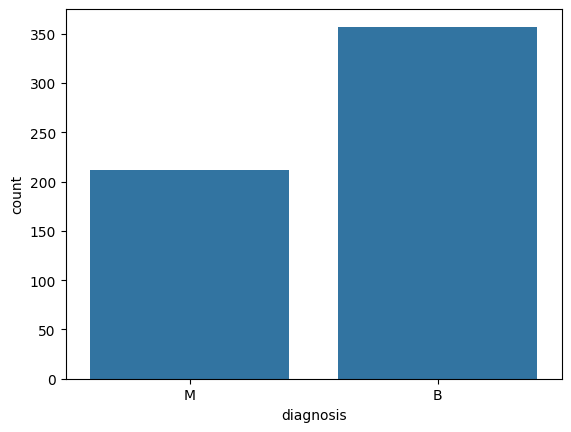

In [57]:
# Visualizando a proporção
sns.countplot(data=Df_Predict_Cancer, x='diagnosis');


In [58]:
# Verificando a existência de dados duplicados
Df_Predict_Cancer.duplicated().sum()

np.int64(0)

In [59]:
# Removendo Colunas com mais de 80% de valores ausentes
Df_Predict_Cancer.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [60]:
Df_Predict_Cancer.drop(columns=['Unnamed: 32'], inplace=True)

In [61]:
Df_Predict_Cancer.shape

(569, 32)

In [62]:
# Mapeamento target (0 = B, 1 = M) M = malignant, B = benign
df_target = {'M': 1, 'B': 0}

# Converter nomes para números
Df_Predict_Cancer['diagnosis'] = Df_Predict_Cancer['diagnosis'].map(df_target)

In [63]:
Df_Predict_Cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PREPARAÇÃO DOS DADOS

In [64]:
# Separando as variáveis explicativas da variável target
abt = Df_Predict_Cancer.drop(columns=['diagnosis', 'id'])
target = Df_Predict_Cancer.diagnosis

#Validando os dados
abt.shape

(569, 30)

In [65]:
target.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [66]:
# Reservar 80% para treino e 20% para teste.

from sklearn.model_selection import train_test_split

# Dividindo o DataFrame em treino e teste
X_train, X_test, y_train, y_test = train_test_split(abt,target,test_size=0.2,random_state=42, stratify= target) #Stratify vai permitir que a proporção do target (88% para 0 e 11% para 1) seja mantida no treino e no teste

# Visualizando o 'shape' dos dados de treino e teste
print(f"Número de linhas e colunas dos dados de treino, respectivamente: {X_train.shape}")

print(f"Número de linhas e colunas dos dados de teste, respectivamente: {X_test.shape}")

Número de linhas e colunas dos dados de treino, respectivamente: (455, 30)
Número de linhas e colunas dos dados de teste, respectivamente: (114, 30)


In [67]:
# Verificando a proporção da variável target
pd.Series(y_train).value_counts(1)*100

,proportion
diagnosis,
0,62.637363
1,37.362637


In [68]:
pd.Series(y_test).value_counts(1)*100

,proportion
diagnosis,
0,63.157895
1,36.842105


## Tratamento das Variáveis Categóricas

Para o presente projeto não será necessário realizar tratamento de variável
categórica.
A única variável categórica é o próprio target.



## Tratamento das Variáveis Numéricas (Padronização dos Dados)

In [69]:
#Padronização dos dados

from sklearn.preprocessing import StandardScaler  #A classe StandardScaler escala os dados subtraindo a média de cada feature e dividindo pelo desvio padrão.

# Instanciando o scaler
scaler = StandardScaler()

# Selecionando colunas numéricas do conjunto de treino e teste
numeric_cols_train = X_train.select_dtypes(exclude=['object']).columns
numeric_cols_test = X_test.select_dtypes(exclude=['object']).columns

# Ajustando e transformando os dados de treino
X_train_scaled = X_train.copy()  # Copiar para preservar os dados originais
X_train_scaled[numeric_cols_train] = scaler.fit_transform(X_train[numeric_cols_train])

# Aplicando a transformação ao conjunto de teste
X_test_scaled = X_test.copy()  # Copiar para preservar os dados originais
X_test_scaled[numeric_cols_test] = scaler.transform(X_test[numeric_cols_test])


print(f'Colunas numéricas: {numeric_cols_train}')

Colunas numéricas: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [70]:
#Validando os dados
X_test_scaled.shape, X_train_scaled.shape

((114, 30), (455, 30))

In [71]:
X_train_scaled.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
10,0.518559,0.891826,0.424632,0.383925,-0.974744,-0.689772,-0.688586,-0.398175,-1.039155,-0.825056,...,0.579798,1.313242,0.466908,0.445983,-0.596155,-0.634722,-0.610227,-0.235744,0.054566,0.021837
170,-0.516364,-1.639710,-0.541349,-0.542961,0.476219,-0.631834,-0.604281,-0.303075,0.521543,-0.454523,...,-0.582459,-1.690291,-0.611934,-0.587014,0.273582,-0.814844,-0.712666,-0.323208,-0.137576,-0.904402
407,-0.368118,0.455515,-0.388250,-0.402970,-1.432979,-0.383927,-0.342175,-0.765459,-0.850857,-0.226171,...,-0.398622,0.181977,-0.475431,-0.420778,-1.622785,-0.391399,-0.431313,-0.890825,-0.675893,-0.144016
430,0.205285,0.726168,0.400330,0.070612,0.243253,2.203585,2.256094,1.213233,0.818474,0.899791,...,-0.000309,0.274191,0.513776,-0.099482,0.418538,2.865970,2.958619,1.977064,-0.075646,1.728848
27,1.243005,0.194195,1.210377,1.206652,-0.111442,0.051348,0.732962,0.713767,-0.427187,-0.822184,...,1.012835,0.223144,0.938517,0.880910,0.073201,-0.277006,0.327775,0.501859,-0.909322,-0.546249


## Feature Selection (Seleção de Variáveis)

### Por Variância

Variáveis com baixa variância (com valores quase constantes) não contribuem muito para a previsão ou classificação, pois tem pouca informação útil.

VarianceThreshold remove todos os recursos cuja variância não atende a algum limite. Por padrão, ela remove todos os recursos de variância zero, ou seja, recursos que têm o mesmo valor em todas as amostras.

In [72]:
from sklearn.feature_selection import VarianceThreshold

# Definindo o limiar (queremos manter as variáveis que têm uma variância superior ao valor definido)

threshold = 0

selector = VarianceThreshold(threshold)
selector.fit_transform(X_train_scaled)

# Colunas selecionadas
selected_features = X_train_scaled.columns[selector.get_support()]

# Colunas descartadas
discarded_features = X_train_scaled.columns[~selector.get_support()]

# Manter apenas features selecionadas
X_train_select01 = X_train_scaled[selected_features]
X_test_select01 = X_test_scaled[selected_features]


print('Variáveis que serão deletadas: ', discarded_features)
print('Variáveis que serão mantidas: ', selected_features)
print(f"Total de features após a seleção: {X_train_select01.shape[1]}")

Variáveis que serão deletadas:  Index([], dtype='object')
Variáveis que serão mantidas:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')
Total de features após a seleção: 30


### Por Feature Importance

In [73]:
# para o projeto em estudo vamos utilizar o RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_select01, y_train)

# Obter importância das variáveis
feature_importances = rf.feature_importances_
features = pd.DataFrame({
    'Feature': X_train_select01.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.3

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X_train_select01.columns[feature_importances > cutoff].tolist()

X_train_select02 = X_train_select01[selected_features]
X_test_select02 = X_test_select01[selected_features]


print(f"Total de features após a seleção: {X_train_select02.shape[1]}")
print(f"Variáveis selecionadas: {selected_features}")

Total de features após a seleção: 9
Variáveis selecionadas: ['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst']


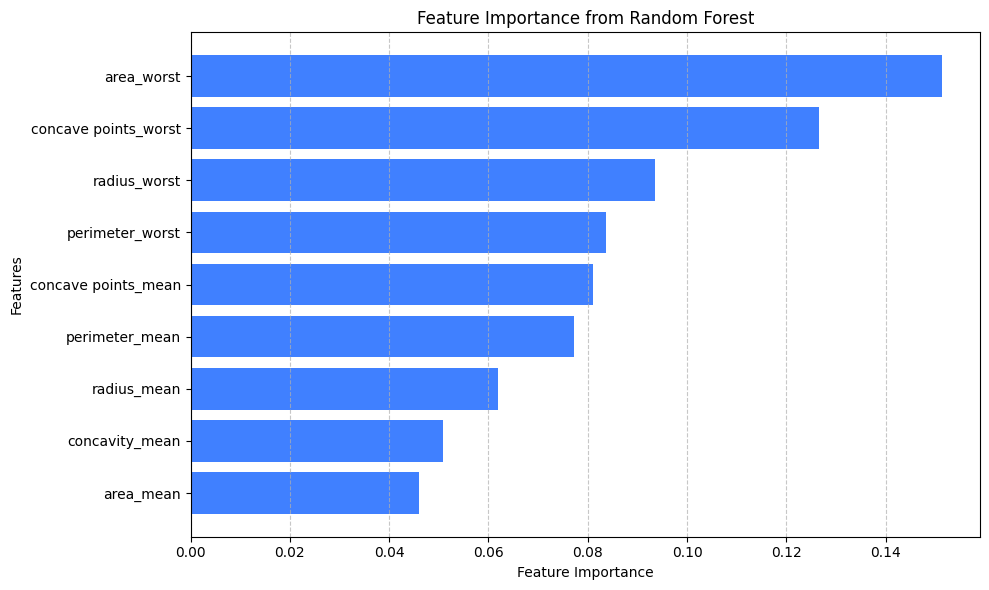

In [74]:
# Visualizando a importância das variáveis em barras horizontais

# Pegando os índices apenas das variáveis selecionadas
selected_idx = [i for i, feature in enumerate(X_train_select01.columns) if feature in selected_features]

# Reordenando os índices das variáveis selecionadas
sorted_idx = np.argsort(feature_importances[selected_idx])

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.barh(np.array(selected_features)[sorted_idx], feature_importances[selected_idx][sorted_idx], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
X_train_select02.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst
10,0.518559,0.424632,0.383925,-0.688586,-0.398175,0.579798,0.466908,0.445983,-0.235744
170,-0.516364,-0.541349,-0.542961,-0.604281,-0.303075,-0.582459,-0.611934,-0.587014,-0.323208
407,-0.368118,-0.388250,-0.402970,-0.342175,-0.765459,-0.398622,-0.475431,-0.420778,-0.890825
430,0.205285,0.400330,0.070612,2.256094,1.213233,-0.000309,0.513776,-0.099482,1.977064
27,1.243005,1.210377,1.206652,0.732962,0.713767,1.012835,0.938517,0.880910,0.501859


In [76]:
X_train_select02.shape

(455, 9)

#### **Salvando tabelas de treino e teste pós preparação dos dados**

In [77]:
#### Trazer o target para a tabela pós dataprep

# Inner join usando o índice
abt_train = pd.merge( X_train_select02, target, left_index=True, right_index=True, how='inner')
abt_train.shape

abt_test = pd.merge(X_test_select02, target, left_index=True, right_index=True, how='inner')
abt_test.shape


(114, 10)

In [78]:
#validando
abt_train.shape, abt_test.shape

((455, 10), (114, 10))

In [79]:
abt_train.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
10,0.518559,0.424632,0.383925,-0.688586,-0.398175,0.579798,0.466908,0.445983,-0.235744,1
170,-0.516364,-0.541349,-0.542961,-0.604281,-0.303075,-0.582459,-0.611934,-0.587014,-0.323208,0
407,-0.368118,-0.388250,-0.402970,-0.342175,-0.765459,-0.398622,-0.475431,-0.420778,-0.890825,0
430,0.205285,0.400330,0.070612,2.256094,1.213233,-0.000309,0.513776,-0.099482,1.977064,1
27,1.243005,1.210377,1.206652,0.732962,0.713767,1.012835,0.938517,0.880910,0.501859,1


In [80]:
abt_test.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
120,-0.770899,-0.764517,-0.711840,-0.662486,-0.574754,-0.721358,-0.706549,-0.653370,-0.388057,0
250,1.894726,1.890816,1.956605,2.230361,2.068127,1.885038,1.682546,1.924393,1.422926,1
375,0.560515,0.570440,0.358094,-0.277843,0.125003,0.126334,0.153478,-0.049972,0.143916,0
99,0.071025,0.091703,-0.047437,0.057540,0.236500,-0.004395,0.048026,-0.110312,0.614184,1
455,-0.219873,-0.237986,-0.284366,-0.747404,-0.413058,-0.265851,-0.327211,-0.317977,-0.567029,0


In [81]:
#Salvando a ABT

abt_train.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Predicao_Cancer/abt_train.csv')
abt_test.to_csv('/content/drive/MyDrive/PodAcademy/Tarefas/Predicao_Cancer/abt_test.csv')

# MODELAGEM

Para o presente projeto vamos aplicar o modelo de Árvore de Decisão

In [82]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score, accuracy_score, precision_score, recall_score, auc, roc_curve, classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.base import clone
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from statistics import mean
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt


In [93]:
# Definindo o modelo
k = 5
folds = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# Armazenar métricas de cada fold
metrics_list = []

for fold, (train_index, test_index) in enumerate(folds.split(X_train_select02, y_train)):

    # Divisão dos dados
    X_train_fold = X_train_select02.iloc[train_index]
    y_train_fold = y_train.iloc[train_index]

    # Aplicar SMOTE (somente nos dados de treino)
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_fold, y_train_fold)

    # Treinar modelo
    model_dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
    model_dt.fit(X_resampled, y_resampled.values.flatten())

    X_test_fold = X_train_select02.iloc[test_index]
    y_test_fold = y_train.iloc[test_index]

    # Previsões com os dados de teste, ou seja, com dados DESBALANCEADOS
    y_pred_test = model_dt.predict(X_test_fold)

    #Obtendo a probabilidade de cada registro pertencer a classe 1
    y_proba_test = model_dt.predict_proba(X_test_fold)[:, 1]

    # Métricas principais
    acc = accuracy_score(y_test_fold, y_pred_test)
    prec = precision_score(y_test_fold, y_pred_test)
    recall = recall_score(y_test_fold, y_pred_test)
    auc = roc_auc_score(y_test_fold, y_proba_test)
    gini = 2 * auc - 1

    # Cálculo do KS
    df_temp = pd.DataFrame({'true': y_test_fold, 'proba': y_proba_test})
    df_temp = df_temp.sort_values(by='proba', ascending=False)
    df_temp['cum_true'] = df_temp['true'].cumsum() / df_temp['true'].sum()
    df_temp['cum_false'] = ((1 - df_temp['true']).cumsum()) / ((1 - df_temp['true']).sum())
    ks = max(abs(df_temp['cum_true'] - df_temp['cum_false']))

    # Armazenar as métricas
    metrics_list.append({
        'Fold': fold + 1,
        'Acuracia': acc,
        'Precisao': prec,
        'Recall': recall,
        'AUC_ROC': auc,
        'GINI': gini,
        'KS': ks
    })

# métricas por fold
df_metrics = pd.DataFrame(metrics_list)
print("\nMétricas por Fold:")
print(df_metrics)

# Média das métricas
print("\nMédia das Métricas de teste:")
print(df_metrics.mean(numeric_only=True))


Métricas por Fold:
   Fold  Acuracia  Precisao    Recall   AUC_ROC      GINI        KS
0     1  0.945055  0.967742  0.882353  0.964654  0.929309  0.888545
1     2  0.956044  0.968750  0.911765  0.996904  0.993808  0.982456
2     3  0.901099  0.857143  0.882353  0.936017  0.872033  0.824045
3     4  0.945055  0.891892  0.970588  0.948142  0.896285  0.917957
4     5  0.945055  0.891892  0.970588  0.973426  0.946852  0.935501

Média das Métricas de teste:
Fold        3.000000
Acuracia    0.938462
Precisao    0.915484
Recall      0.923529
AUC_ROC     0.963829
GINI        0.927657
KS          0.909701
dtype: float64


   Passos aplicados para o balanceamento
   
    1. Dividir em treino e teste
    2. Aplicar SMOTE no treino
    3. Treinar o modelo com dados balanceados
    4. Testar no conjunto original (não balanceado)
    5. Avaliar e imprimir resultados

In [84]:
#verificando o balanceamento das classes (dados de teste)
print(y_train.value_counts(normalize=True))

diagnosis
0    0.626374
1    0.373626
Name: proportion, dtype: float64


In [85]:
#verificando o balanceamento das classes (dados de treino)
print(y_resampled.value_counts(normalize=True))

diagnosis
0    0.5
1    0.5
Name: proportion, dtype: float64


In [86]:
model_dt

DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)